In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

mydata=pd.read_csv('/Users/caseycloutier/Desktop/Theses/Honors585 Paper Data/cleaned data/finaldata.csv')

#impport packages and dataset

In [60]:
avg_vaxes=mydata.groupby(['Date', 'biden_True'], as_index=False)['Series_Complete_18PlusPop_Pct'].mean()
#sort dataset

In [61]:
avg_vaxes=avg_vaxes[~avg_vaxes['Date'].str.startswith('2020')]
avg_vaxes['biden_True']=avg_vaxes['biden_True'].astype(str)

#remove 2020 from vax data & convert to string 

<ipython-input-62-ab8ffeff5fae>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(select_biden['Date'])


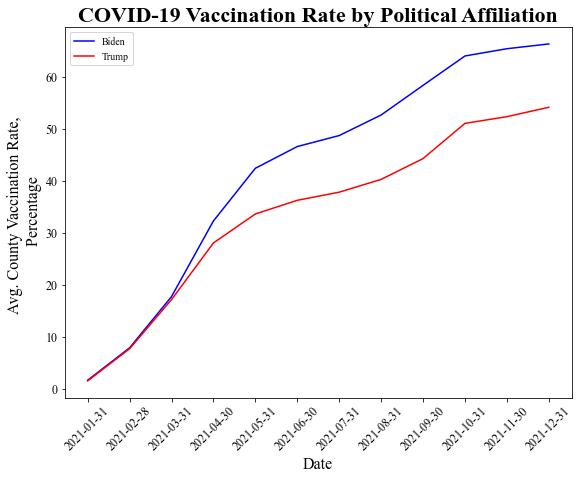

In [62]:
select_biden=avg_vaxes[(avg_vaxes['biden_True'] == '1')] # filter the data for a set of states
select_trump=avg_vaxes[(avg_vaxes['biden_True'] == '0')]

plt.rcParams.update({'font.family':'Times New Roman'})

fig=plt.figure(figsize=(20,15))
ax1 = plt.subplot(2,2,1)

ax1.plot(select_biden['Date'],select_biden['Series_Complete_18PlusPop_Pct'], label='Biden', color='blue') #creating a line plot to be added
ax1.plot(select_trump['Date'],select_trump['Series_Complete_18PlusPop_Pct'], label='Trump', color='red')

ax1.set_title('COVID-19 Vaccination Rate by Political Affiliation', fontweight='bold', fontsize=22)
ax1.set_ylabel('Avg. County Vaccination Rate, \n Percentage', fontsize=16)
ax1.set_xlabel('Date', fontsize=16)
ax1.tick_params(axis='x', labelrotation = 45)
ax1.set_xticklabels(select_biden['Date'])
ax1.tick_params(axis='both', which='major', labelsize=12)
#change formatting of graphs 


plt.legend() #add legend 


In [63]:
lfpr=pd.read_csv('/Users/caseycloutier/Desktop/Theses/Honors585 Paper Data/paper graphs/fredgraph.csv')
#open lfpr data

<ipython-input-64-b677f6797d1e>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(lfpr['DATE'])


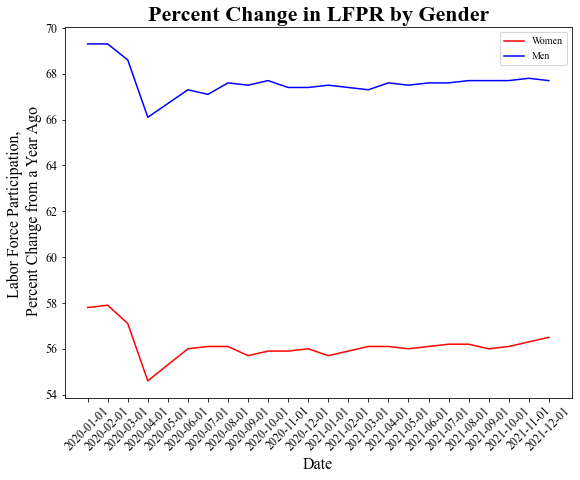

In [64]:
#womeb LNS11300002
#men LNS11300001

plt.rcParams.update({'font.family':'Times New Roman'}) #set font 

fig=plt.figure(figsize=(20,15))
ax1 = plt.subplot(2,2,1) #change size of plot

ax1.plot(lfpr['DATE'],lfpr['LNS11300002'], label='Women', color='red') #creating a line plot to be added
ax1.plot(lfpr['DATE'],lfpr['LNS11300001'], label='Men', color='blue')

ax1.set_title('Percent Change in LFPR by Gender', fontweight='bold', fontsize=22)
ax1.set_ylabel('Labor Force Participation, \n Percent Change from a Year Ago', fontsize=16)
ax1.set_xlabel('Date', fontsize=16)
ax1.tick_params(axis='x', labelrotation = 45)
ax1.set_xticklabels(lfpr['DATE'])
ax1.tick_params(axis='both', which='major', labelsize=12)
#change formatting of graph


plt.legend()

fig.savefig('/Users/caseycloutier/Desktop/Theses/Honors585 Paper Data/paper graphs/lfpr.png') #save graph

In [66]:
mydata=mydata.fillna(0) #replace NaN for 0

In [67]:
treat=mydata[mydata['treat_true'] == 1]
control=mydata[mydata['treat_true']==0] #filter into 1 and 0's for treatment and control groups

treat_means=treat.groupby(['Date'], as_index=False)['UR_rate'].mean()
control_means=control.groupby(['Date'],as_index=False)['UR_rate'].mean() #create mean UR for each group

<ipython-input-69-d890ccd6b794>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treat['Date'])


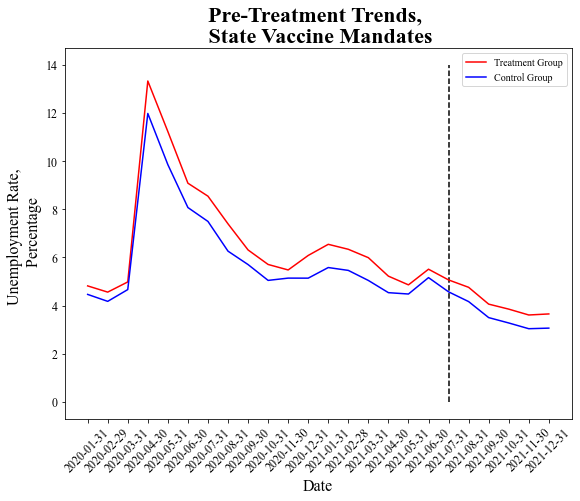

In [69]:
plt.rcParams.update({'font.family':'Times New Roman'}) #set font type

fig=plt.figure(figsize=(20,15))
ax1 = plt.subplot(2,2,1) #change size

ax1.plot(treat_means['Date'],treat_means['UR_rate'], label='Treatment Group', color='red') #creating a line plot to be added
ax1.plot(control_means['Date'],control_means['UR_rate'], label='Control Group', color='blue')

ax1.set_title('Pre-Treatment Trends, \n State Vaccine Mandates', fontweight='bold', fontsize=22)
ax1.set_ylabel('Unemployment Rate, \n Percentage', fontsize=16)
ax1.set_xlabel('Date', fontsize=16)
ax1.tick_params(axis='x', labelrotation = 45)
ax1.set_xticklabels(treat['Date'])
ax1.tick_params(axis='both', which='major', labelsize=12)
plt.vlines('2021-07-31', 0, 14, color='black', linestyle='dashed')
#change formatting


plt.legend()
plt.savefig('/Users/caseycloutier/Desktop/Theses/Honors585 Paper Data/paper graphs/mandate_parallel.png',transparent=True)
#add legend and save